# Student Performance Indicator

## Life Cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform 
- Exploratory Data analysis
- Data Pre Processing 
- Model Traning 
- Choose Best Model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

# Importing the libraries 

numpy,pandas,seaborn,matplotlib and Warning Library

In [68]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib.inline
import warnings
warnings.filterwarnings('ignore')

UsageError: Line magic function `%matplotlib.inline` not found.


In [69]:
print('aakash')

aakash


In [70]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [71]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score


### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

# 3.1 Checking the missing values 

In [72]:
df.isna().sum()

# no missing values 

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

# checking the duplicates

In [73]:
df.duplicated().sum()
# There are no duplicates found

0

In [74]:
# checking the data type 

# checking null and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#  checking the unique value in each column

In [75]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [76]:
# checking the statistics of the dataset
df.describe()

# sari value kareeb kareeb dikh rhi hain isi liye hum 3no ko leke 
# ek column mein trasform kr skte hai "Total_Score"  


,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [77]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Checking various categories present in the dataset 

In [78]:
def categories_in_dataset(col_name):
      print('The categories in {} variable is :        '.format(col_name),end= "  ")
      print(df[col_name].unique())

lst = ['gender','race_ethnicity','parental_level_of_education','lunch','test_preparation_course']
for i in lst:
      categories_in_dataset(i)

The categories in gender variable is :          ['female' 'male']
The categories in race_ethnicity variable is :          ['group B' 'group C' 'group A' 'group D' 'group E']
The categories in parental_level_of_education variable is :          ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The categories in lunch variable is :          ['standard' 'free/reduced']
The categories in test_preparation_course variable is :          ['none' 'completed']


# DEfining the numerical and categorical Feature columns

In [79]:
# for numerical 
numerical_featuraes = [feature for feature in df.columns if df[feature].dtype != 'O' ]
numerical_featuraes

['math_score', 'reading_score', 'writing_score']

In [80]:
# for categorical 
categorical_featuraes = [feature for feature in df.columns if df[feature].dtype == 'O' ]
categorical_featuraes 

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

# Adding the Total_Score column in dataframe
## feature Engineering kr rhe hain  

In [81]:
df['Total_Score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['Total_Score']/3

In [82]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [83]:
df.describe()

,math_score,reading_score,writing_score,Total_Score,average
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [84]:
# exploring the information 
reading_full_marks=df[df['reading_score']==100]['average'].count()
writing_full_marks=df[df['writing_score']==100]['average'].count()
math_full_marks=df[df['math_score']==100]['average'].count()

print('The number of  full marks of reading : ',reading_full_marks)
print('The number of  full marks of writing : ',writing_full_marks)
print('The number of  full marks of math : ',math_full_marks)

The number of  full marks of reading :  17
The number of  full marks of writing :  14
The number of  full marks of math :  7


In [85]:
# exploring the information 
reading_lessThan20_marks=df[df['reading_score'] <20]['average'].count()
writing_lessThan20_marks=df[df['writing_score'] <20]['average'].count()
math_lessThan20_marks=df[df['math_score'] <20]['average'].count()

print('The number of  full marks of reading : ',reading_lessThan20_marks)
print('The number of  full marks of writing : ',writing_lessThan20_marks)
print('The number of  full marks of math : ',math_lessThan20_marks)

The number of  full marks of reading :  1
The number of  full marks of writing :  3
The number of  full marks of math :  4


### Insights
- from the above worst performance in maths 
- Best performance in reading section 

# 4 Exploring Data (Visualization)
## 4.1 Visualizing the average score distribution to make some conclusion
- Histogram
- KDE plot 

# 4.1.1 Histogram & KDE plotting 

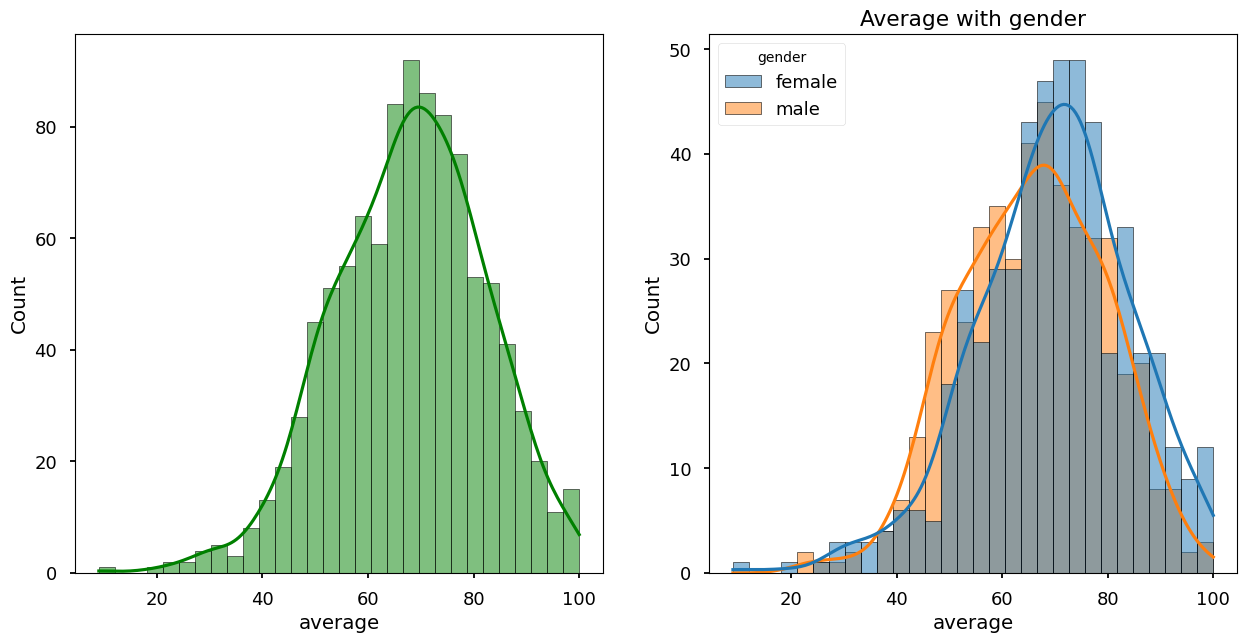

In [86]:
fig,axis =plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
plt.title('Average with gender')
plt.show()

# Insights 
- Female students tend to perform well then male students

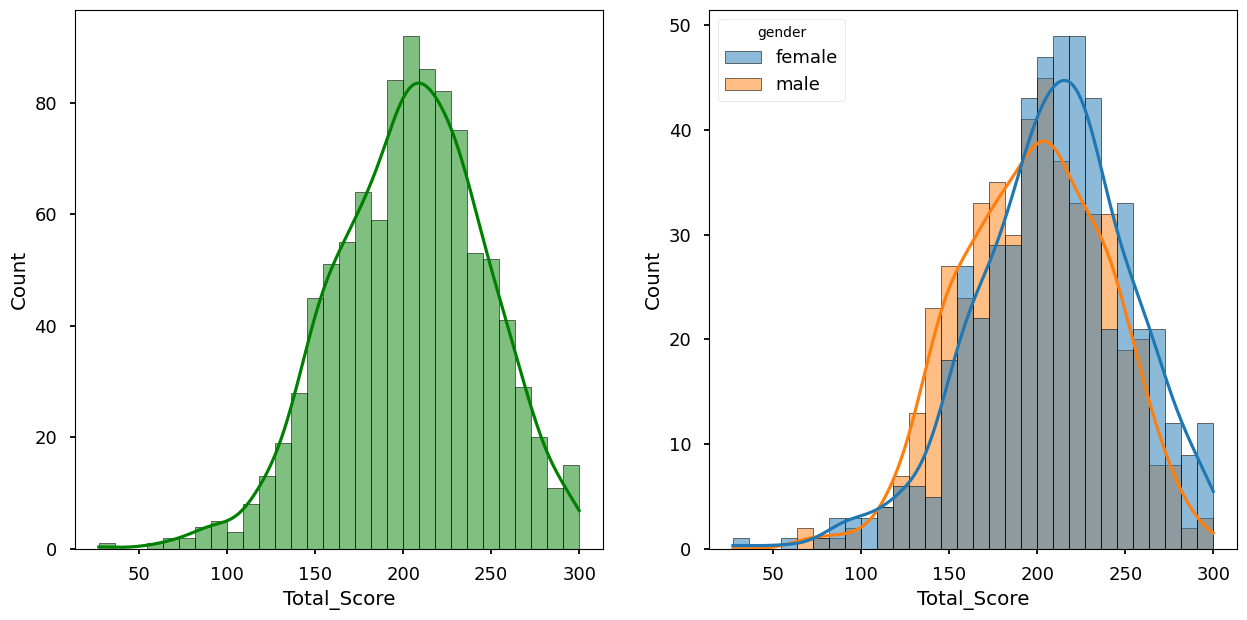

In [87]:
fig,axis =plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total_Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_Score',bins=30,kde=True,hue='gender')
plt.show()

C:\Users\aakas\AppData\Local\Temp\ipykernel_6640\3917165361.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\aakas\AppData\Local\Temp\ipykernel_6640\3917165361.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\aakas\AppData\Local\Temp\ipykernel_6640\3917165361.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


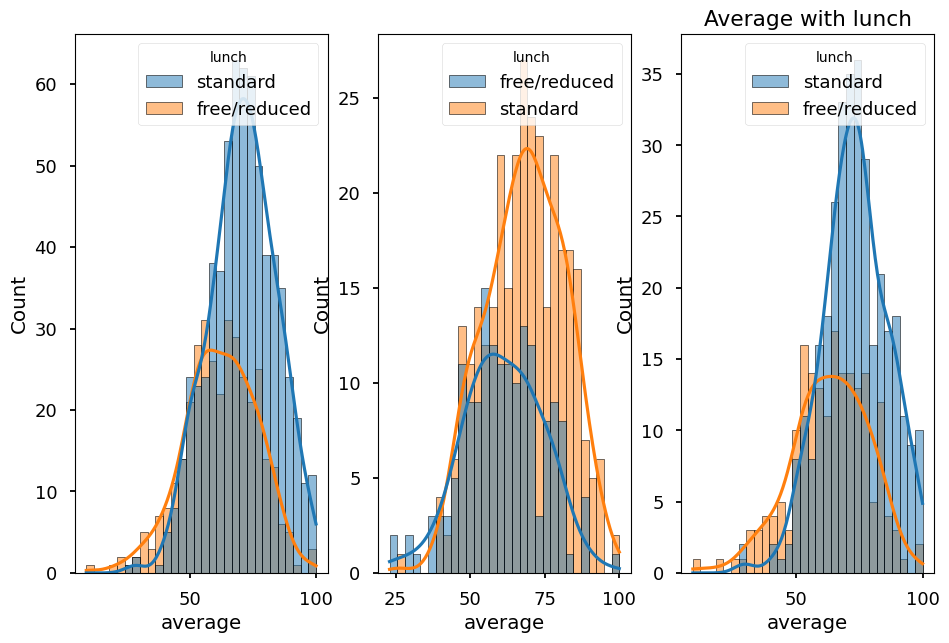

In [88]:
fig,axis =plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,kde=True,hue='lunch')
plt.title('Average with lunch')
plt.show()

# Insights 
- standard lunch helps perform well in exams 
- standard lunch perform both for the male and female 


C:\Users\aakas\AppData\Local\Temp\ipykernel_6640\3233429658.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)


C:\Users\aakas\AppData\Local\Temp\ipykernel_6640\3233429658.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\aakas\AppData\Local\Temp\ipykernel_6640\3233429658.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


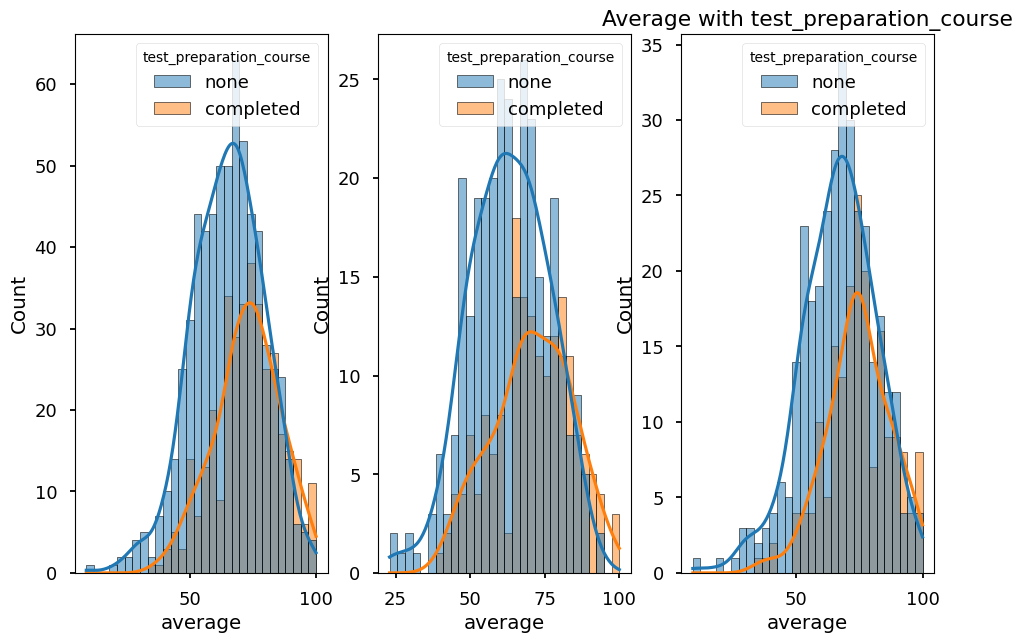

In [89]:
fig,axis =plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='test_preparation_course')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,hue='test_preparation_course')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,kde=True,hue='test_preparation_course')
plt.title('Average with test_preparation_course')
plt.show()

C:\Users\aakas\AppData\Local\Temp\ipykernel_6640\97973173.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)
C:\Users\aakas\AppData\Local\Temp\ipykernel_6640\97973173.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(132)


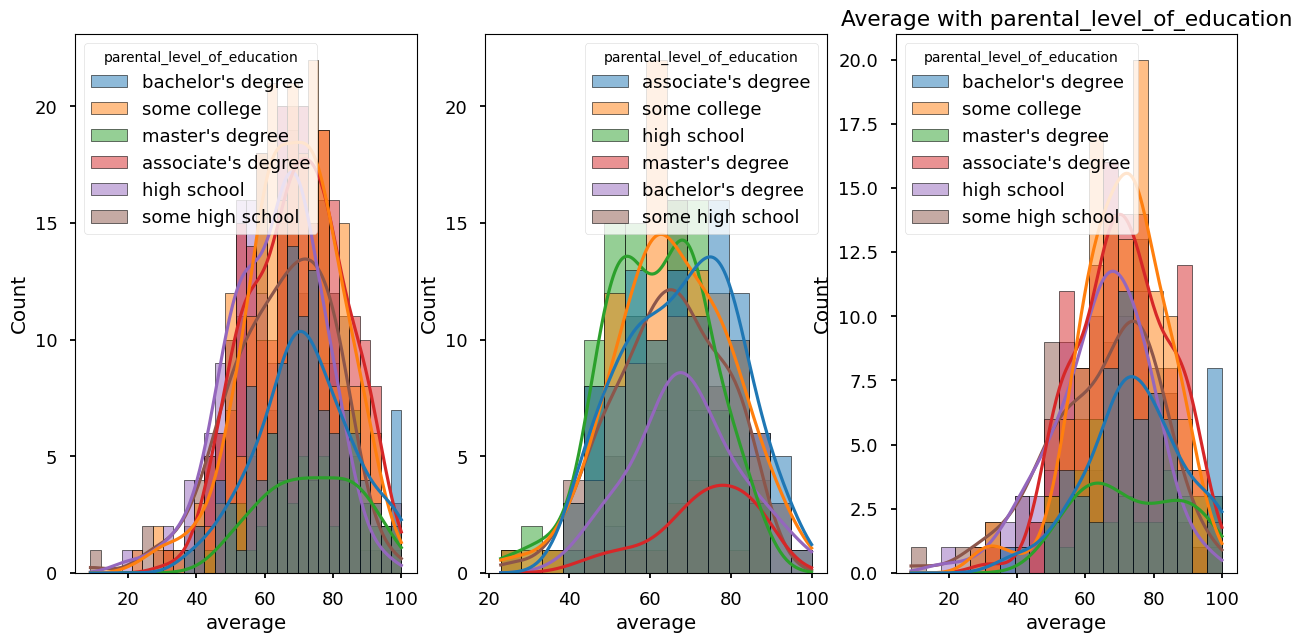

In [90]:
fig,axis =plt.subplots(1,2,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.title('Average with parental_level_of_education')
plt.show()

# Insights 
- in general the parental level of education does not help to perform well in exam
- 2nd plot show parents whose education is of associate degree or masters degress their male child tend to perform well in exam 
- 3rd plot we can see there is no effect of parents education on female students 

C:\Users\aakas\AppData\Local\Temp\ipykernel_6640\4242450831.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\aakas\AppData\Local\Temp\ipykernel_6640\4242450831.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\aakas\AppData\Local\Temp\ipykernel_6640\4242450831.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


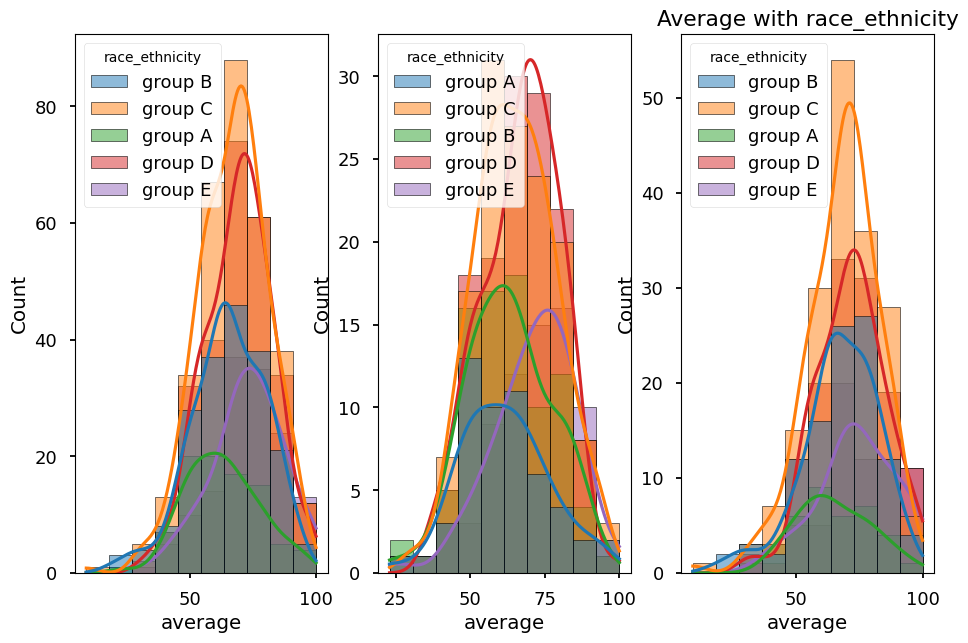

In [91]:
fig,axis =plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='average',bins=10,kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',bins=10,kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',bins=10,kde=True,hue='race_ethnicity')
plt.title('Average with race_ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

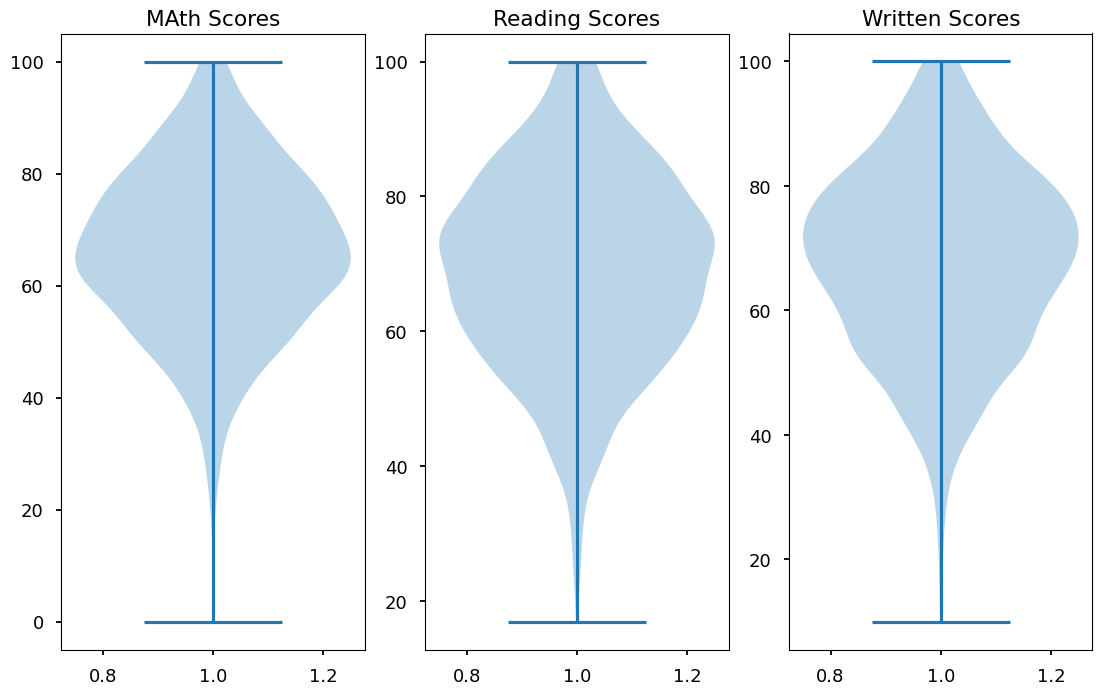

In [92]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MAth Scores')
plt.violinplot('math_score',data=df)
plt.subplot(1,4,2)
plt.title('Reading Scores')
plt.violinplot('reading_score',data=df)
plt.subplot(1,4,3)
plt.title('Written Scores')
plt.violinplot('writing_score',data=df)
plt.show()

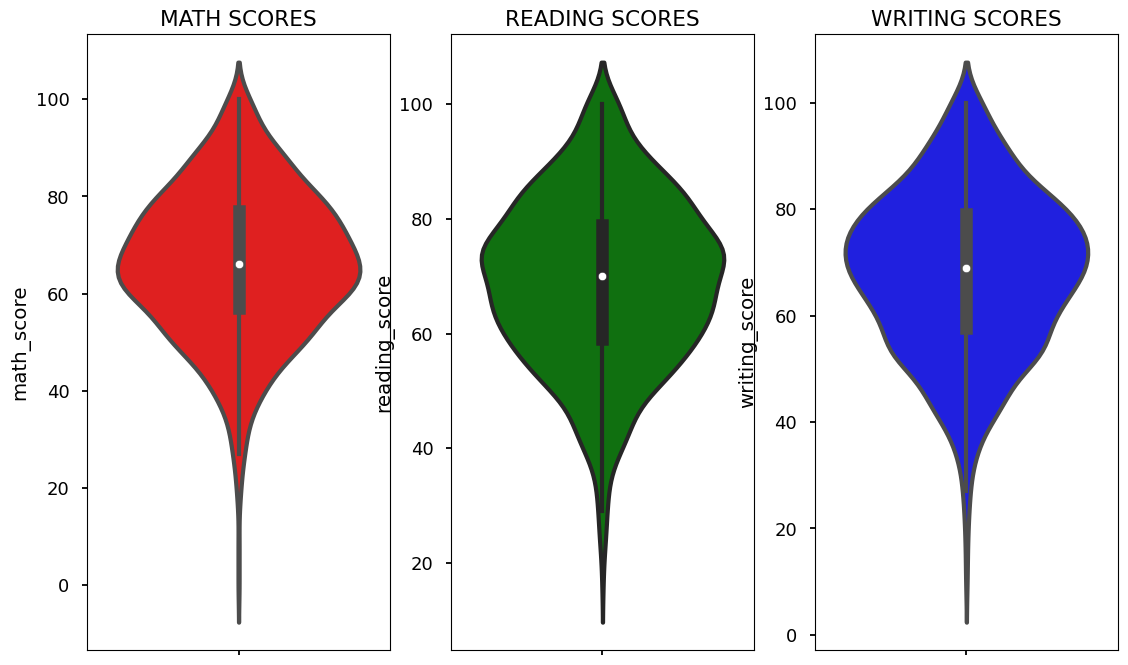

In [93]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c3f43ac6a0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c3f43ac490>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c3fa0f0940>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c3fa0f0d90>}

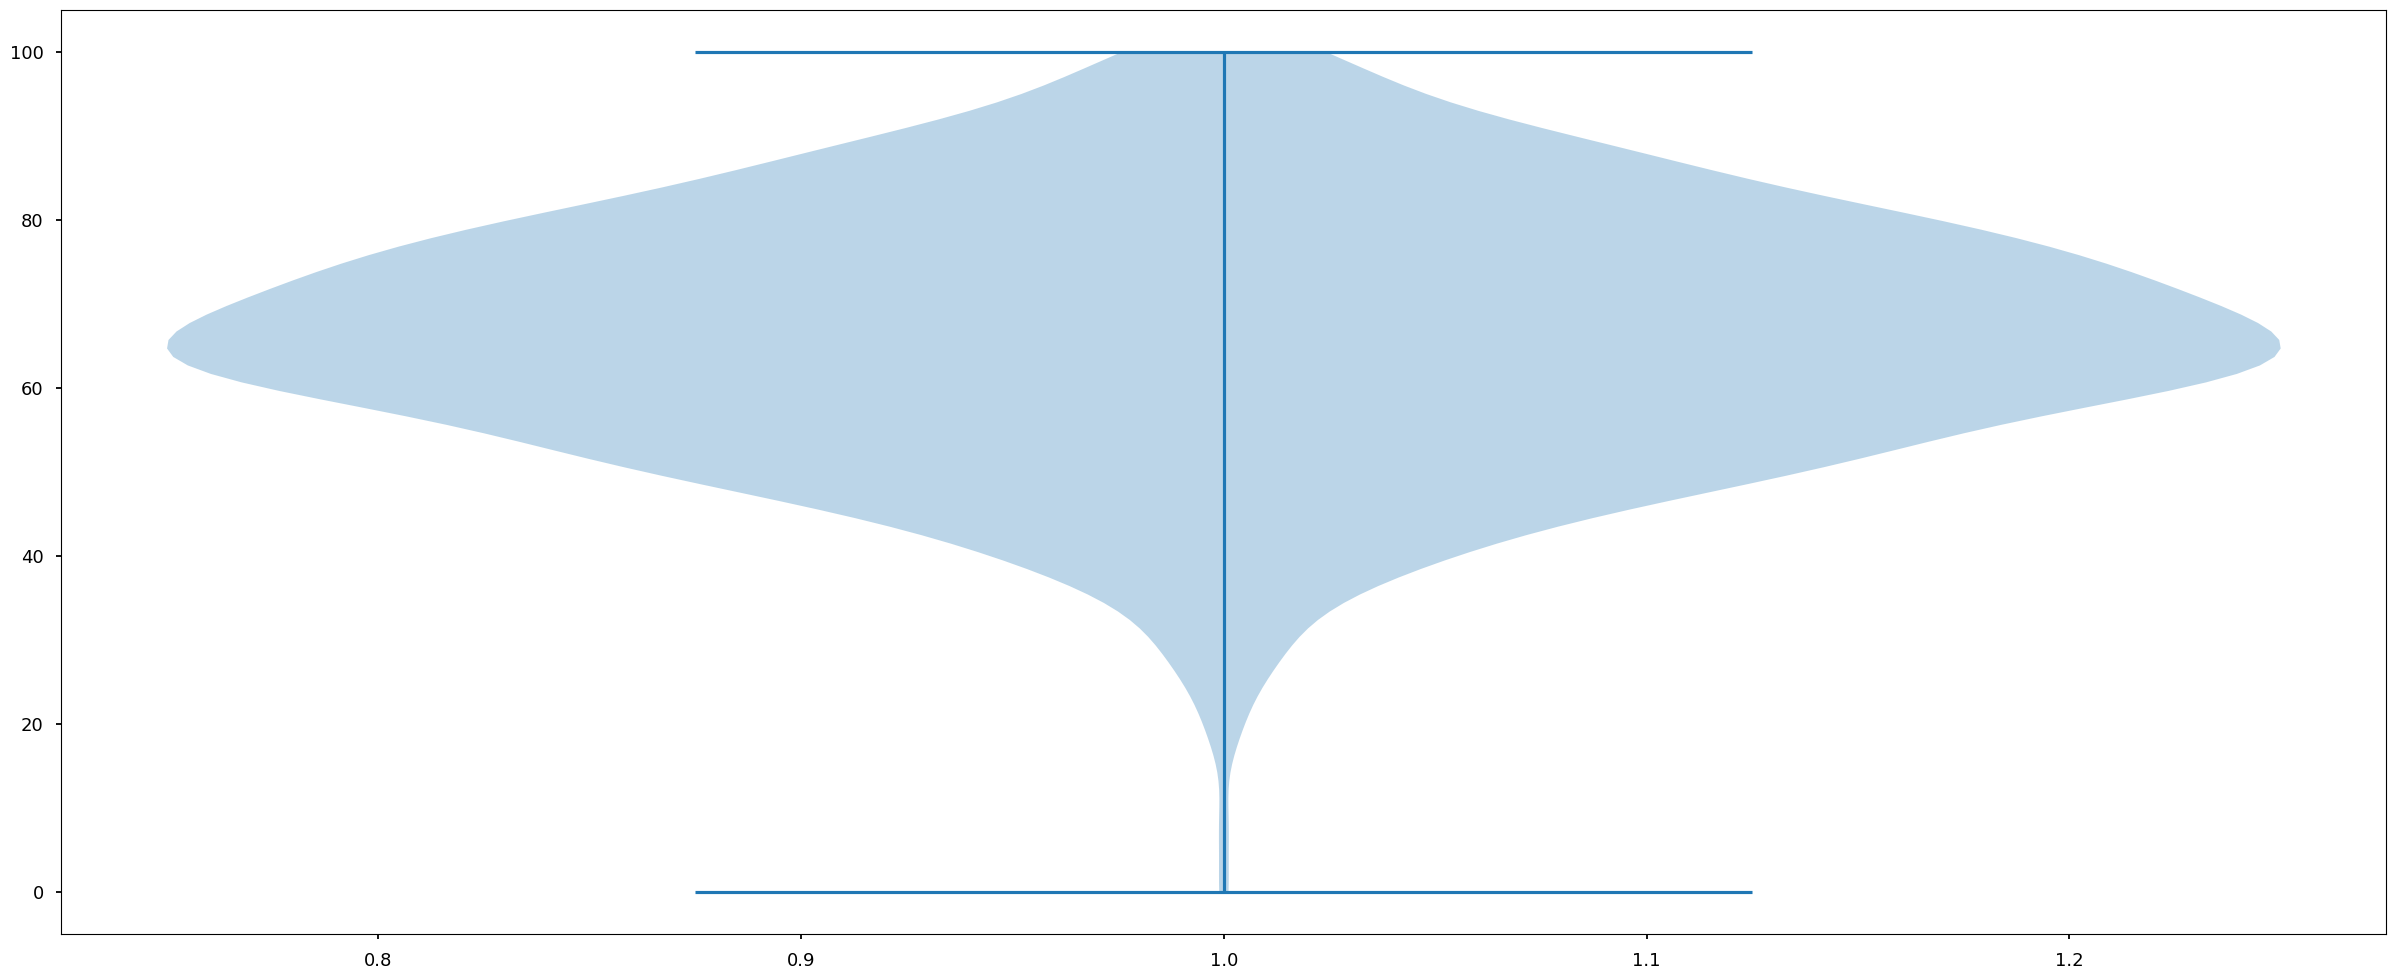

In [94]:
plt.violinplot('math_score',data=df)

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

# 4.3 Multivariate analysis using pieplot

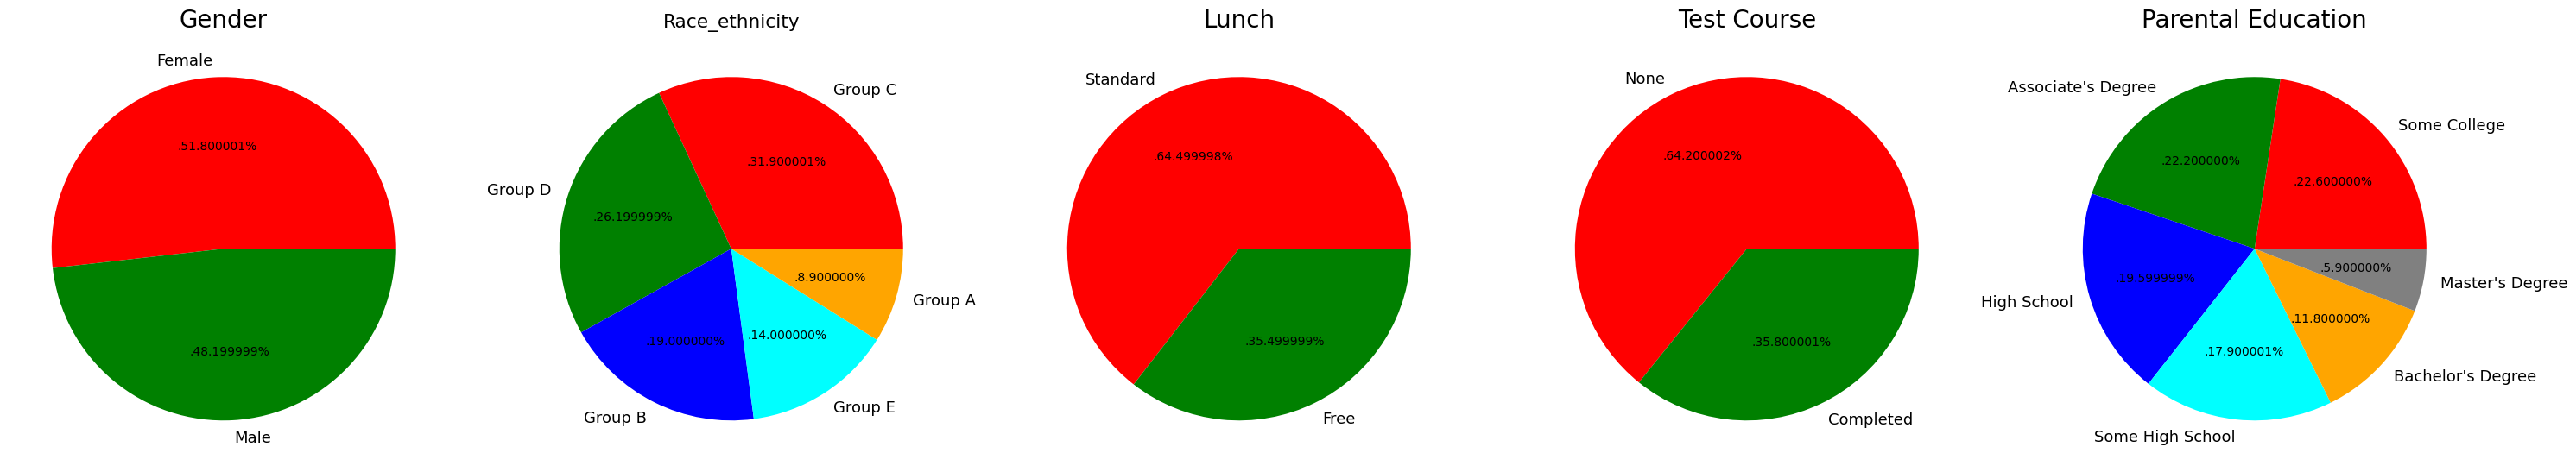

In [95]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%' )
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels = 'Group C','Group D','Group B','Group E','Group A'
color = ['red','green','blue','cyan','orange']

plt.pie(size,labels=labels,colors=color,autopct = '.%2f%%')
plt.title('Race_ethnicity')
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

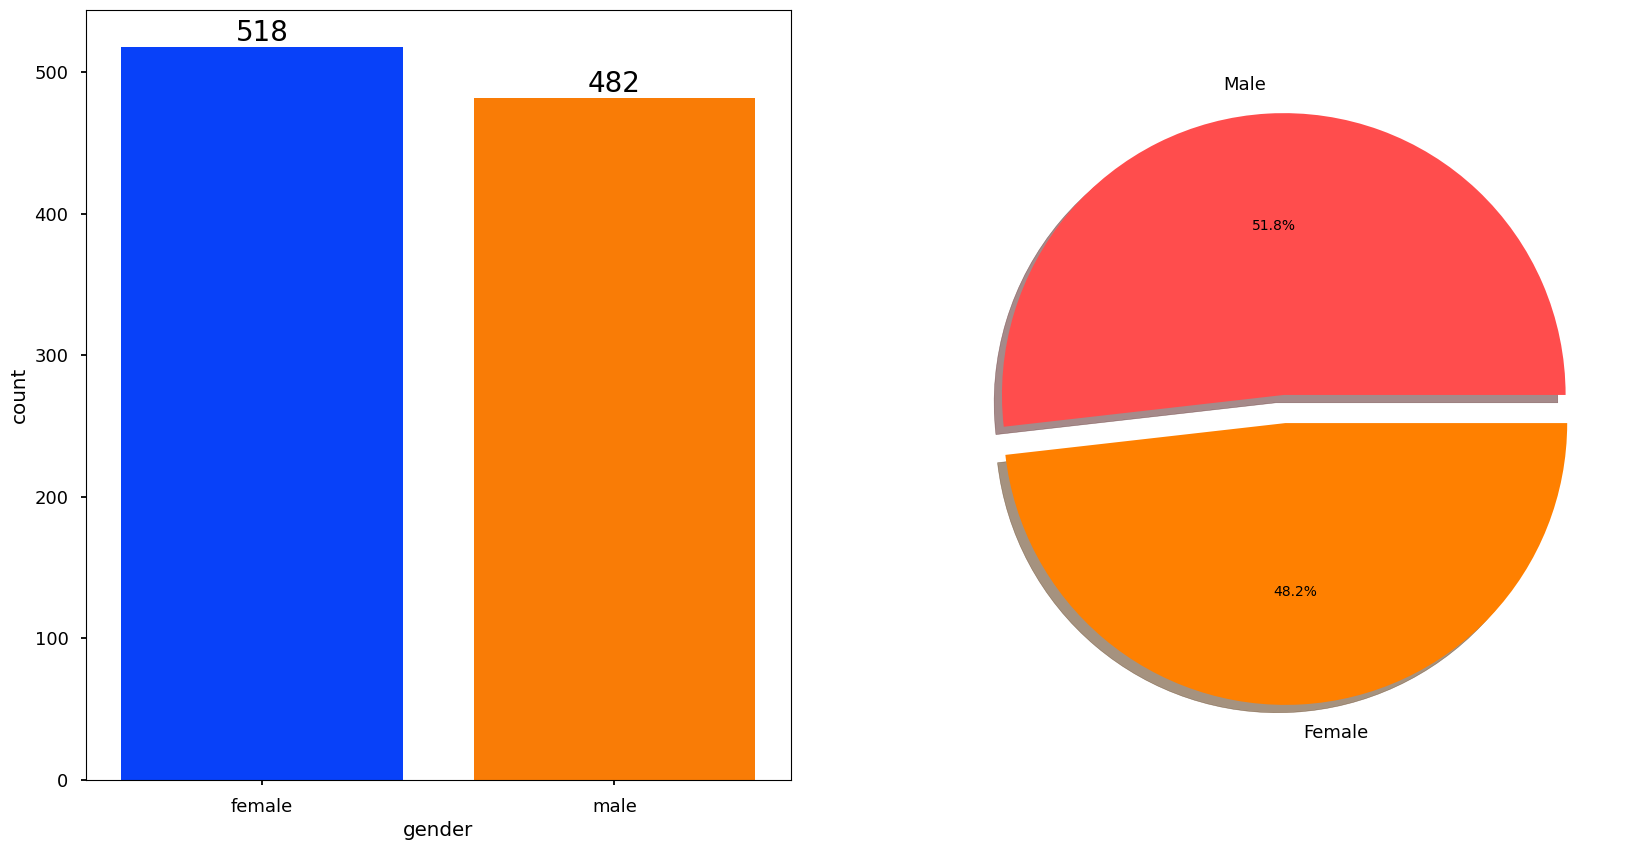

In [96]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
      ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) ``

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [97]:
gender_group = df.groupby('gender')
gender_group

In [98]:
gender_group=df.groupby('gender')

plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

IndexError: Column(s) average already selected

<Figure size 1000x800 with 0 Axes>

[Text(0, 0, '63.6332'), Text(0, 0, '68.7282')]


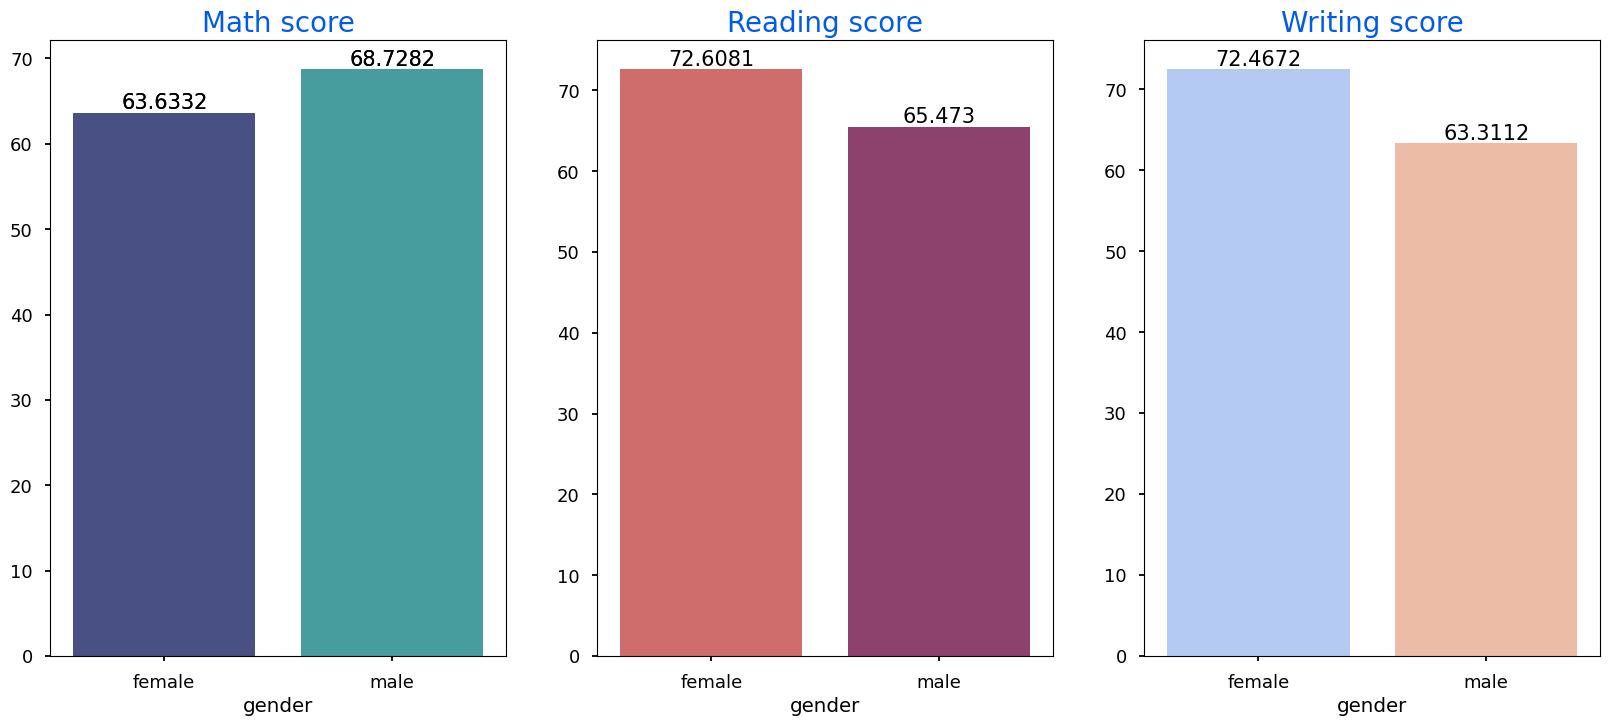

In [119]:
Group_data2=df.groupby('gender')

f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0],)
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    print(ax[0].bar_label(container,color='black',size=15))

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

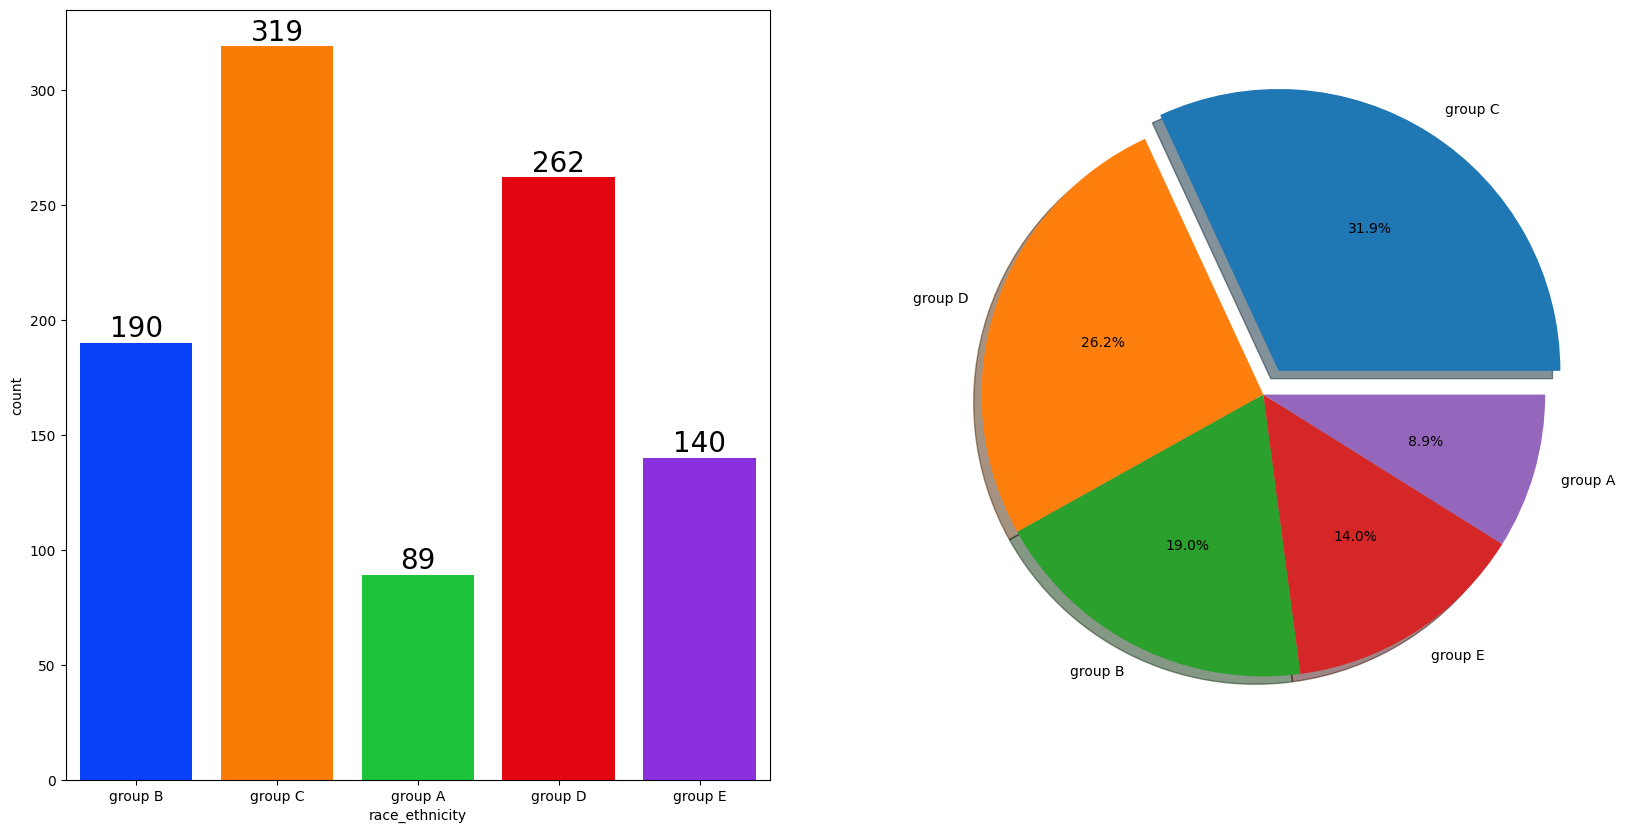

In [ ]:
f,ax = plt.subplots(1,2,figsize= (20,10))
sns.countplot(x=df['race_ethnicity'],data = df,palette ='bright',ax = ax[0],saturation=0.95)

# by this we will get the numbers labelled on the graph in the groups inside it 
for container in ax[0].containers:
      ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['race_ethnicity'].value_counts(),labels= df['race_ethnicity'].value_counts().index,explode = [0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

# insights 
- Most of the students belonging from group c and group d
- Lowest number of person belongs from group A

# BIVARIATE ANALYSIS (Is RACE/ETHNICITY has any impact on student's performance ?)

[Text(0, 0, '61.6292'), Text(0, 0, '63.4526'), Text(0, 0, '64.4639'), Text(0, 0, '67.3626'), Text(0, 0, '73.8214')]


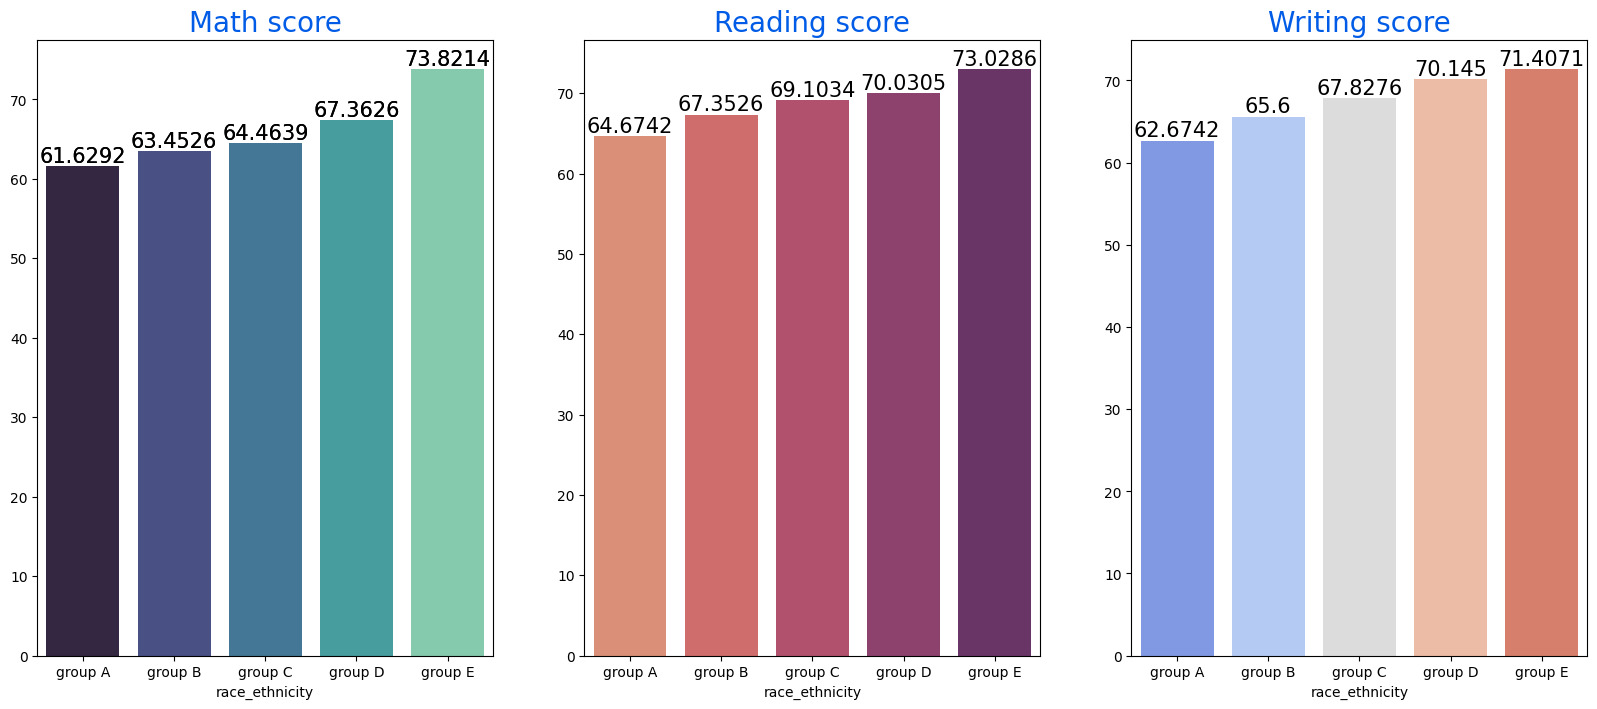

In [ ]:
Group_data2=df.groupby('race_ethnicity')

f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    print(ax[0].bar_label(container,color='black',size=15))

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

# insights 
- Group E students have scored the highest marks
- Group A students have scored the lowest marks 
- Student from a lower socioeconomic status have a lower avg in all course subjects 

# 4.4.3 Parental level of EDUCATION COLUMN 

- what is educational backgroud of the student parents?
- Is parential education has any impact on Student's Performance?

# Univariate Analysis (What is Educational Backgroud of Student's parent ?)

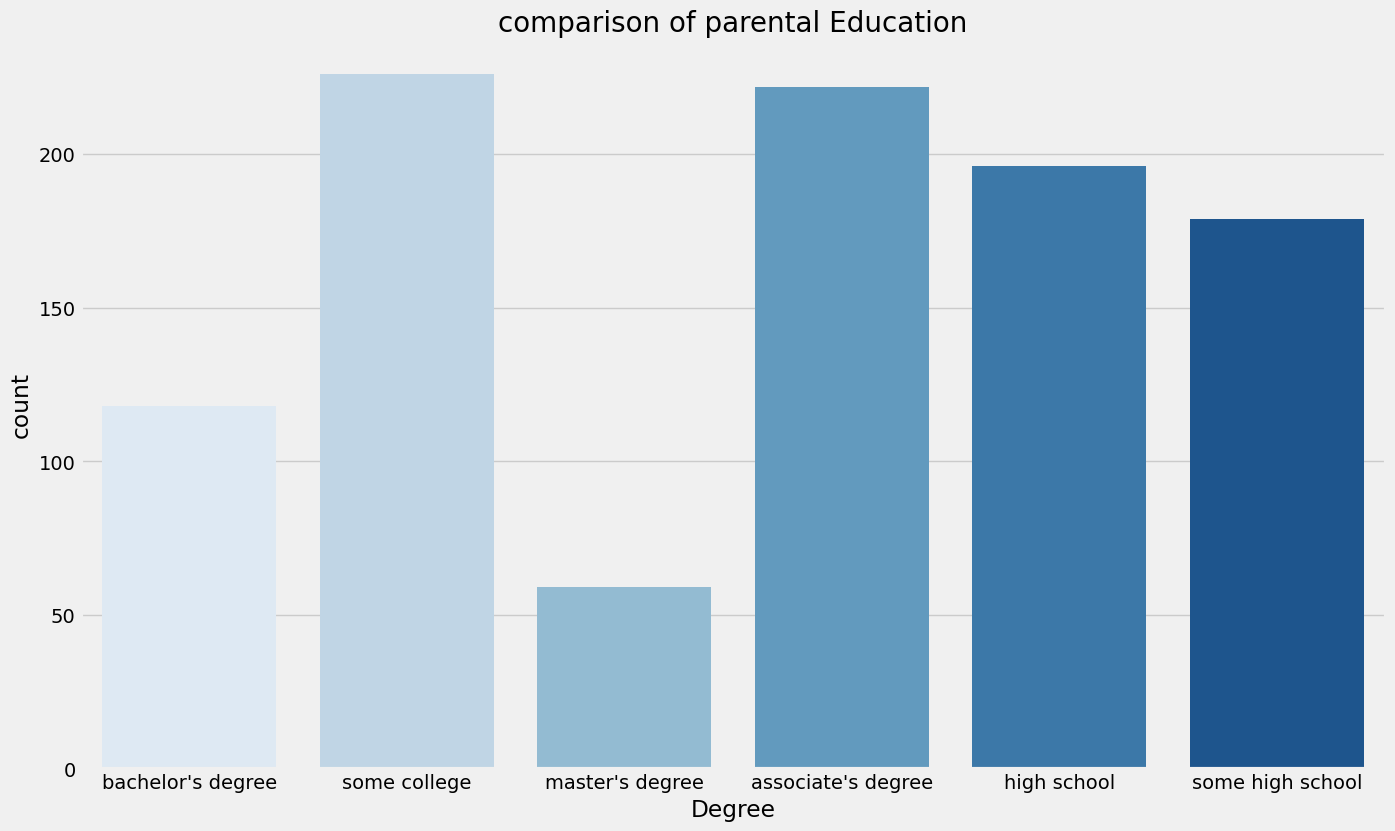

In [ ]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental_level_of_education'],palette='Blues')
plt.title('comparison of parental Education',fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

# Insights
- Largest number of parents are from some college.

# BIVARIATE ANALYSIS (Is parental education has any impact on student's performance ?)

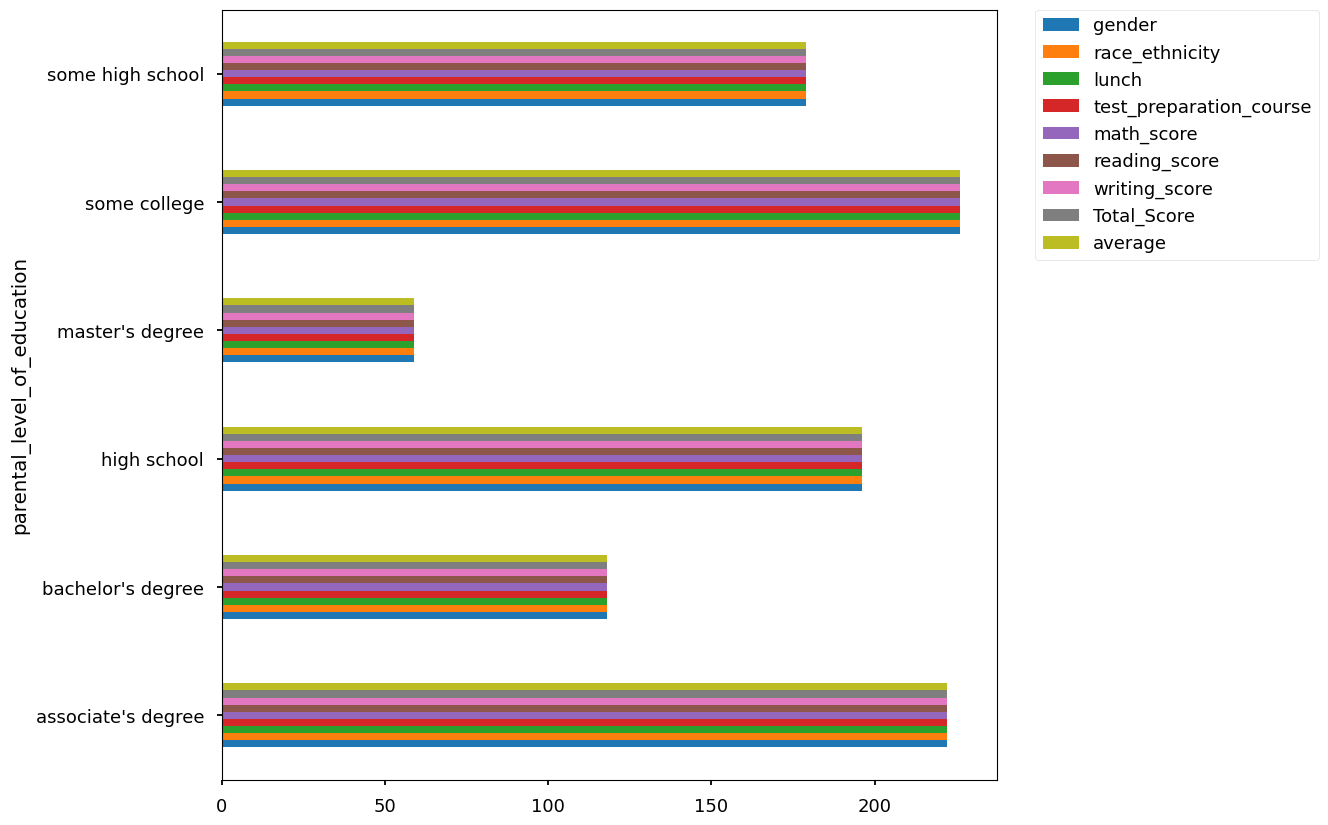

In [120]:
df.groupby('parental_level_of_education').agg('count').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
# df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
# plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   Total_Score                  1000 non-null   int64  
 9   average                      1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


C:\Users\aakas\AppData\Local\Temp\ipykernel_6640\194448032.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


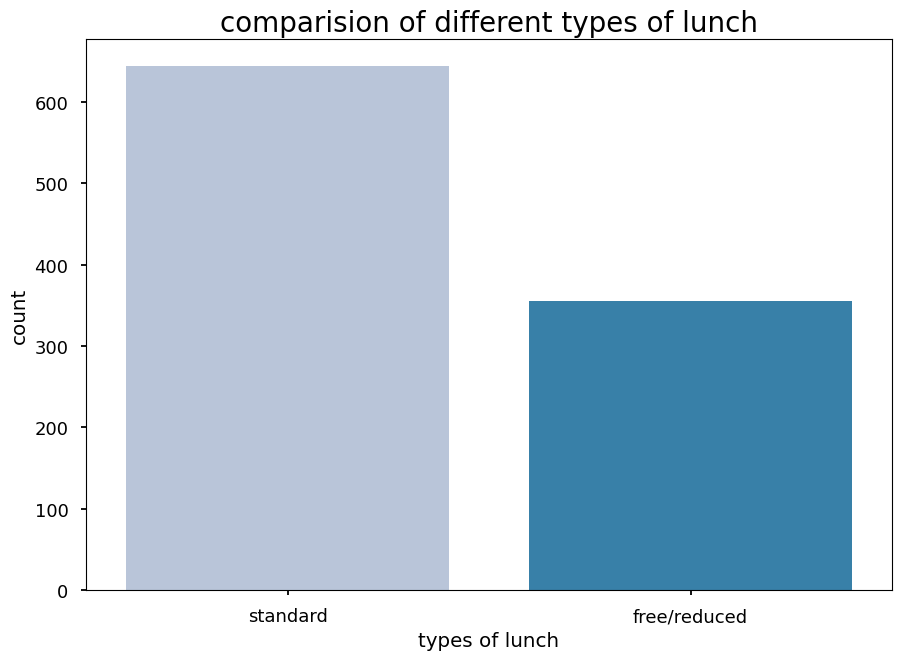

In [ ]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('seaborn-talk')
sns.countplot(x=df['lunch'],palette='PuBu')
plt.title('comparision of different types of lunch',fontdict={'weight':30,'size':20})
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

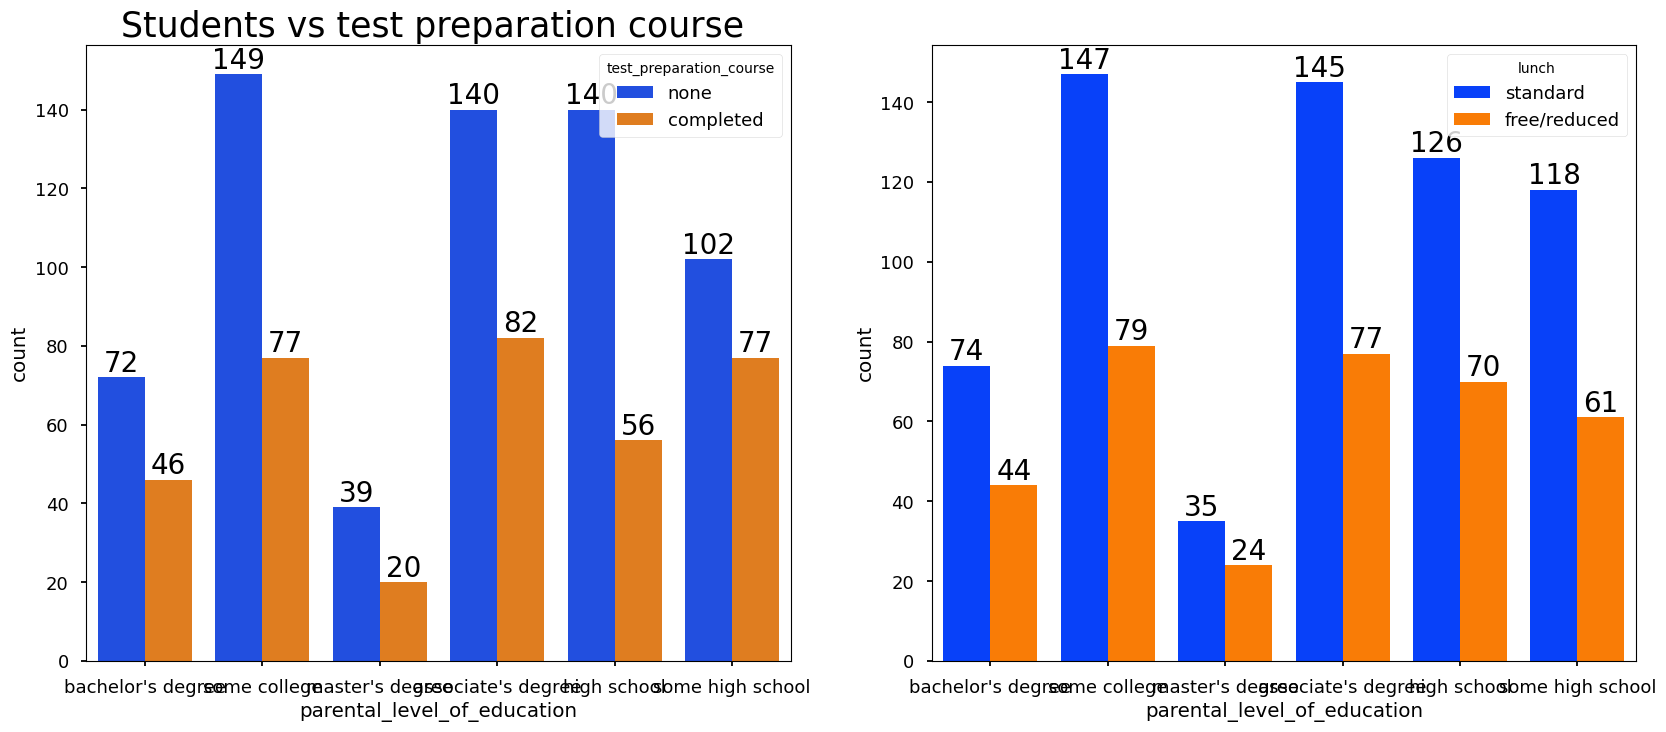

In [107]:
f,ax = plt.subplots(1,2,figsize=(20,8))
plt.subplot(121)
sns.countplot(x=df['parental_level_of_education'],data = df,palette = 'bright',hue = 'test_preparation_course')
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.subplot(122)
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

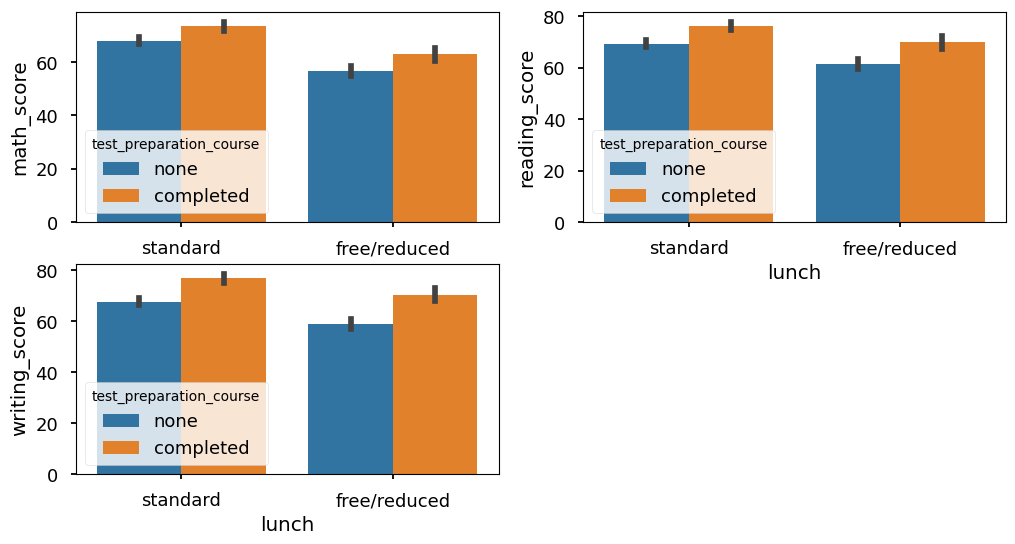

In [111]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'],y=df['math_score'],hue=df['test_preparation_course'])

plt.subplot(2,2,2)
sns.barplot(x=df['lunch'],y=df['reading_score'],hue=df['test_preparation_course'])

plt.subplot(2,2,3)
sns.barplot(x=df['lunch'],y=df['writing_score'],hue=df['test_preparation_course'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

# Checking Outliers 

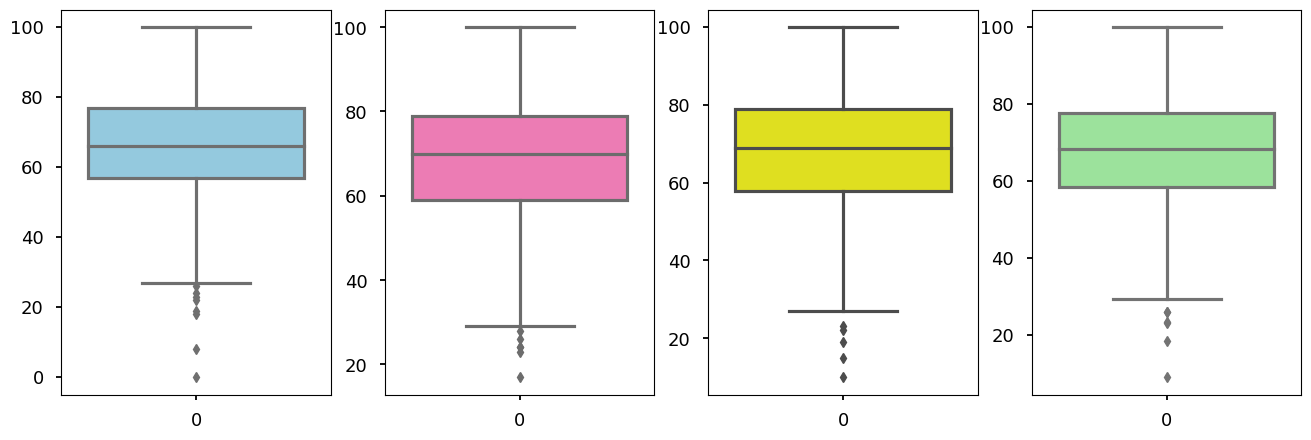

In [118]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

ERROR: Could not find a version that satisfies the requirement scikt-learn (from versions: none)
ERROR: No matching distribution found for scikt-learn
